In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
#from pandas import datetime
import matplotlib.pyplot as plt
from numpy import log
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset loaded

In [ ]:
import chardet
file="/content/GTD.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
import chardet
file="/content/data_1970_80.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
import chardet
file="/content/data_96_2010.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
import chardet
file="/content/data_2013_14.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [ ]:
import chardet
file="/content/data_2015_17.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
import chardet
file="/content/data_2010_12.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
df=pd.read_csv(file, delimiter=",", encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,61,62,76,79,94,96,114,115) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.010000e+11,2011,1,1,NaN,0,NaN,60,Egypt,10,Middle East & North Africa,Al Iskandariyah (Alexandria),Alexandria,30.762296,29.696268,1.0,0,The attack occurred at the Saints Church in di...,"01/01/2011: On Saturday at 0000 midnight, in t...",1,1,1,0,NaN,NaN,0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,NaN,Civilians,...,NaN,NaN,A suicide improvised explosive device was used...,23.0,0.0,1.0,97.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,The attack caused an unknown amount of propert...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Reuters, ""UPDATE 12 - Suspected Suicide Bomber...","Reuters, ""UPDATE Two - Egypt Holds Seven for Q...","Reuters, ""UPDATE Two-Egypt Blames Palestinian ...",ISVG,1.0,1.0,0.0,1.0,NaN
1,2.010000e+11,2011,1,1,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1.0,0,"The attack occurred on a highway in Baghdad, B...","01/01/2011: On Saturday, on the Mohammed al-Qa...",1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Iraqi Police Service (IPS),A police colonel,...,NaN,NaN,Unknown firearms were used in the attack.,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,The attack caused an unknown amount of propert...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Press TV, ""Iraqi Officer, Driver Killed in Bag...","Xinhua News Agency, ""Two Police Officers, One ...","Voice of Iraq, ""Officer Assassinated with His ...",ISVG,-9.0,-9.0,0.0,-9.0,NaN
2,2.010000e+11,2011,1,1,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Diyala,Baqubah,33.743240,44.623825,1.0,0,The bombing occurred inside the house of a dis...,"01/01/2011: On Saturday morning, in Ba'quba, D...",1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Iraqi Local Government,A house of a district mayor,...,NaN,NaN,An improvised explosive device was used in the...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,The attack caused an unknown amount of propert...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Xinhua News Agency, ""Two Police Officers, One ...","Reuters, ""FACTBOX- Security Developments in Ir...","Agence France Presse, ""Iraq Attack Kill Two Po...",ISVG,-9.0,-9.0,0.0,-9.0,NaN
3,2.010000e+11,2011,1,1,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,Borno,Maiduguri,11.840929,13.141459,1.0,0,"At the Victory Christ Church in Maiduguri, Bor...","01/01/2011: On Saturday night, in Maiduguri, B...",1,1,1,0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Victory Christ Church,A church was targeted in the attack.,...,NaN,NaN,An unknown incendiary device was used in the a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,The attack damaged one section of the church.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Voice of America, ""Nigerian Muslim Sect Blamed...","Yahoo News, ""Church Burned in Nigeria: Police,...","Daily Trust, ""Gunmen

In [ ]:
df.rename(columns={'iyear':'year','iday':'day','imonth':'month'},inplace=True)
df['attack_date'] = pd.to_datetime(df[['year','month','day']],  errors = 'coerce')

In [ ]:

df.nkill=df.nkill.dropna()

In [ ]:
columns_name=df.columns
#for name in columns_name:
 #   print(name)

# Preprocessiong

In [ ]:
null_values=pd.isnull(df).sum()
i=0;
for value in null_values:
    
        print(columns_name[i],"  ","\t", value)
        i+=1;

eventid    	 0
year    	 0
month    	 0
day    	 0
approxdate    	 10479
extended    	 0
resolution    	 10629
country    	 0
country_txt    	 0
region    	 0
region_txt    	 0
provstate    	 0
city    	 46
latitude    	 64
longitude    	 64
specificity    	 3
vicinity    	 0
location    	 3918
summary    	 0
crit1    	 0
crit2    	 0
crit3    	 0
doubtterr    	 0
alternative    	 9248
alternative_txt    	 9248
multiple    	 0
success    	 0
suicide    	 0
attacktype1    	 0
attacktype1_txt    	 0
attacktype2    	 10166
attacktype2_txt    	 10166
attacktype3    	 10708
attacktype3_txt    	 10708
targtype1    	 0
targtype1_txt    	 0
targsubtype1    	 450
targsubtype1_txt    	 450
corp1    	 2009
target1    	 20
natlty1    	 123
natlty1_txt    	 123
targtype2    	 9806
targtype2_txt    	 9806
targsubtype2    	 9819
targsubtype2_txt    	 9819
corp2    	 9931
target2    	 9807
natlty2    	 9817
natlty2_txt    	 9817
targtype3    	 10651
targtype3_txt    	 10651
targsubtype3    	 10655
tar

In [ ]:
print("null values in kill",pd.isnull(df['nkill']).sum())
print("null values in days",pd.isnull(df['attack_date']).sum())
df = df[df['nkill'].notna()]
df=df[df['attack_date'].notna()]

null values in kill 159
null values in days 58


In [ ]:
x_day=df['attack_date']
y_nkill=df['nkill']

In [ ]:
print("null values in kill",pd.isnull(y_nkill).sum())
print("null values in years",pd.isnull(x_day).sum())
print(len(y_nkill))




null values in kill 0
null values in years 0
10527


In [ ]:
train_nkill=y_nkill[0:10000]
test_nkill=y_nkill[10000:10527]

Text(0.5, 1.0, 'plot between the day and nkill')

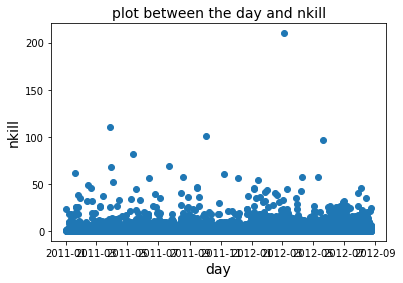

In [ ]:
#x_100=x_day[0:100]
#y_100=y_nkill[0:100]
plt.scatter(x_day,y_nkill)
plt.xlabel('day',fontsize=14)
plt.ylabel('nkill',fontsize=14)
plt.title('plot between the day and nkill',fontsize=14)

In [ ]:
#The P-test tells that the nkill is not significant

In [ ]:
result = adfuller(y_nkill)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -95.739339
p-value: 0.000000


In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
    
	# calculate out of sample error
  
	rmse = sqrt(mean_squared_error(test, predictions))
  #print(model_fit.summary())
	return rmse

In [ ]:
#p=1,d=1,q=0
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = [0, 1, 2, 3]
d_values = [0,1,2,3,]
q_values = [0,1,2,3]
print(d_values)
#warnings.filterwarnings("ignore")
#evaluate_models(y_nkill, p_values, d_values, q_values)


[0, 1, 2, 3]


In [ ]:
model=ARIMA(train_nkill,order=(2,1,2))
fitted = model.fit()
fitted.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.nkill   No. Observations:                 9999
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -30532.423
Method:                       css-mle   S.D. of innovations              5.125
Date:                Tue, 25 Jan 2022   AIC                          61076.846
Time:                        04:18:37   BIC                          61120.107
Sample:                             1   HQIC                         61091.490
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.013e-05    1.9e-05      2.109      0.035    2.83e-06    7.74e-05
ar.L1.D.nkill     0.3452      0.008     40.835      0.000       0.329       0.362
ar.L2.D.nkill    -0.0184      0.010     -1.837      0.066      -0.038       0.001
ma.L1.D.nkill    -1.2783        nan        nan        nan         nan         nan
ma.L2.D.nkill     0.2783        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5787           +0.0000j            3.5787            0.0000
AR.2           15.2116           +0.0000j           15.2116            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            3.5931           +0.0000j            3.5931            0.0000
-----------------------------------------------------------------------------
"""

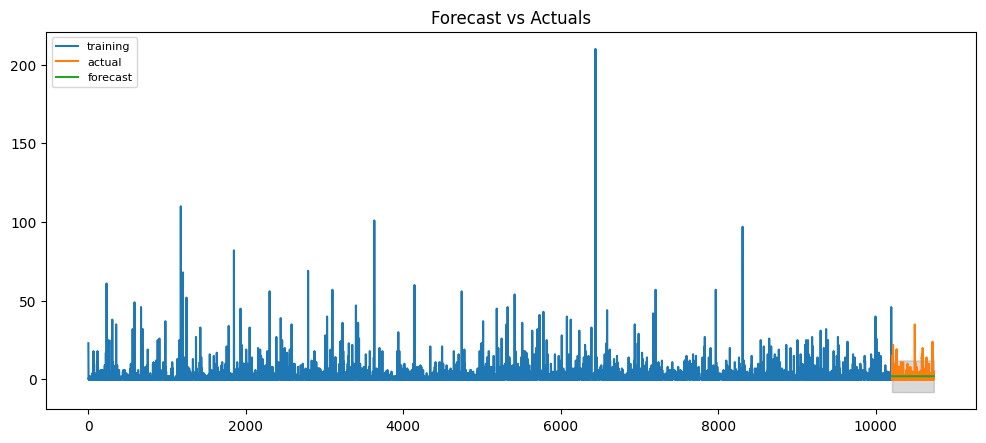

In [ ]:
#model = ARIMA(train, order=(1, 1, 1))  
#fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(527, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_nkill.index)
lower_series = pd.Series(conf[:, 0], index=test_nkill.index)
upper_series = pd.Series(conf[:, 1], index=test_nkill.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_nkill, label='training')
plt.plot(test_nkill, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
   # acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [ ]:
forecast_accuracy(fc, test_nkill.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


{'corr': 0.0755186623432338,
 'mae': 2.2582231431683786,
 'mape': inf,
 'me': 0.251682485001811,
 'minmax': 0.7412393193944744,
 'mpe': inf,
 'rmse': 3.6229507010753252}

In [ ]:
fitted.save('Amodel2015_17.pkl')

In [ ]:
#loaded = ARIMAResults.load('model.pkl')

In [ ]:
#p11970 to 2010
#1970 to 1980
#1981 to 1995
#1996 to 2010
#2011 to 2012
#2013 to 2014
#2015 to 2017
#df = df.loc[(df['Date Time'] >= '2010-01-01')]
dfp1=df.loc[(df['attack_date']>='1970-01-01') &( df['attack_date']<='1980-12-30')]
dfp2=df.loc[(df['attack_date']>='1981-01-01') &( df['attack_date']<='1995-12-30')]
dfp3=df.loc[(df['attack_date']>='1996-01-01') &( df['attack_date']<='2010-12-30')]
dfp4=df.loc[(df['attack_date']>='2011-01-01') &( df['attack_date']<='2012-12-30')]
dfp5=df.loc[(df['attack_date']>='2013-01-01') &( df['attack_date']<='2014-12-30')]
dfp6=df.loc[(df['attack_date']>='2015-01-01') &( df['attack_date']<='2017-12-30')]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


toatl len 10720
null values in kill 0
null values in years 0
10720


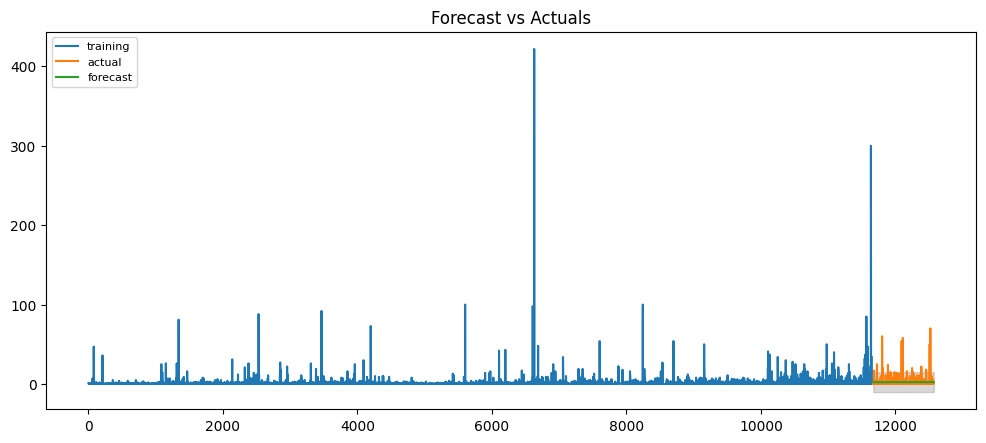

In [ ]:
x_day=dfp1['attack_date']
y_nkill=dfp1['nkill']
print("toatl len",len(y_nkill))
train_nkill=y_nkill.iloc[0:10000]
test_nkill=y_nkill.iloc[10000:10720]
print("null values in kill",pd.isnull(y_nkill).sum())
print("null values in years",pd.isnull(x_day).sum())
print(len(y_nkill))

model=ARIMA(y_nkill,order=(2,1,2))
fitted = model.fit()
fitted.summary()



#model = ARIMA(train, order=(1, 1, 1))  
#fitted = model.fit(disp=-1)  

# Forecast

fc, se, conf = fitted.forecast(len(test_nkill), alpha=0.05)  # 95% conf



# Make as pandas series
fc_series = pd.Series(fc, index=test_nkill.index)
lower_series = pd.Series(conf[:, 0], index=test_nkill.index)
upper_series = pd.Series(conf[:, 1], index=test_nkill.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_nkill, label='training')
plt.plot(test_nkill, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()







fitted.save('model1.pkl')

In [ ]:
forecast_accuracy(fc, test_nkill.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


{'corr': 0.03284668844531455,
 'mae': 2.750821343755283,
 'mape': inf,
 'me': 0.34750072039049634,
 'minmax': 0.7545541628058657,
 'mpe': inf,
 'rmse': 6.026634770169248}

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


toatl len 44185
null values in kill 0
null values in years 0
44185


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


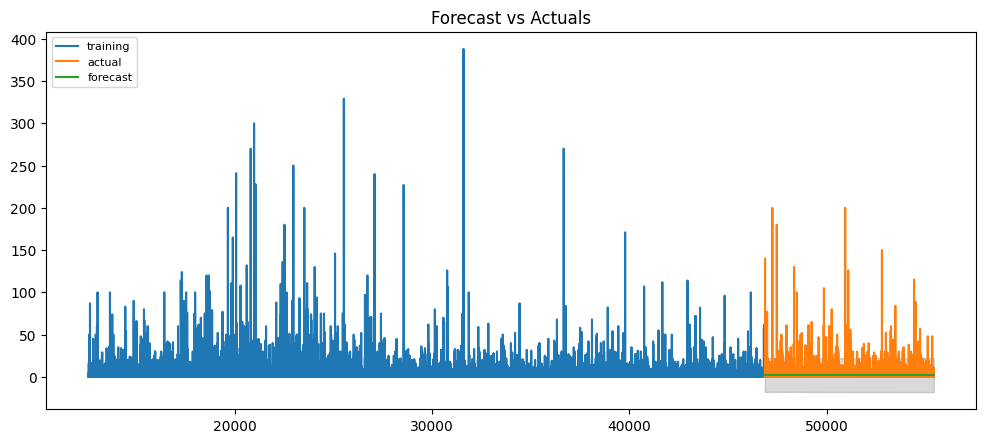

In [ ]:
dfp2=df.loc[(df['attack_date']>='1981-01-01') &( df['attack_date']<='1995-12-30')]






x_day=dfp2['attack_date']
y_nkill=dfp2['nkill']
print("toatl len",len(y_nkill))
train_nkill=y_nkill.iloc[0:30000]
test_nkill=y_nkill.iloc[30000:38427]
print("null values in kill",pd.isnull(y_nkill).sum())
print("null values in years",pd.isnull(x_day).sum())
print(len(y_nkill))

model=ARIMA(y_nkill,order=(2,1,2))
fitted = model.fit()
fitted.summary()



#model = ARIMA(train, order=(1, 1, 1))  
#fitted = model.fit(disp=-1)  

# Forecast

fc, se, conf = fitted.forecast(len(test_nkill), alpha=0.05)  # 95% conf



# Make as pandas series
fc_series = pd.Series(fc, index=test_nkill.index)
lower_series = pd.Series(conf[:, 0], index=test_nkill.index)
upper_series = pd.Series(conf[:, 1], index=test_nkill.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_nkill, label='training')
plt.plot(test_nkill, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()




fitted.save('model2.pkl')

In [ ]:
forecast_accuracy(fc, test_nkill.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


{'corr': 0.029402643200012454,
 'mae': 2.786911010715923,
 'mape': inf,
 'me': 0.2376428339736201,
 'minmax': 0.7901623040851272,
 'mpe': inf,
 'rmse': 7.264512080730527}

In [ ]:
dfp3=df.loc[(df['attack_date']>='1996-01-01') |( df['attack_date']<='2010-1-30')]

x_day=dfp3['attack_date']
y_nkill=dfp3['nkill']
print("toatl len",len(y_nkill))
train_nkill=y_nkill.iloc[0:10000]
test_nkill=y_nkill.iloc[10000:10720]
print("null values in kill",pd.isnull(y_nkill).sum())
print("null values in years",pd.isnull(x_day).sum())

model=ARIMA(y_nkill,order=(2,1,2))
fitted = model.fit()
fitted.summary()



#model = ARIMA(train, order=(1, 1, 1))  
#fitted = model.fit(disp=-1)  

# Forecast

fc, se, conf = fitted.forecast(len(test_nkill), alpha=0.05)  # 95% conf



# Make as pandas series
fc_series = pd.Series(fc, index=test_nkill.index)
lower_series = pd.Series(conf[:, 0], index=test_nkill.index)
upper_series = pd.Series(conf[:, 1], index=test_nkill.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_nkill, label='training')
plt.plot(test_nkill, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()







fitted.save('Amodel.pkl_1996-01-01_2010-1-30')


toatl len 16240
null values in kill 2649
null values in years 0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


MissingDataError: ignored

In [ ]:
#df = df[lambda x: x['Z'] == z]
print(df[lambda x :['attack_date']<='2010-1-01'])

TypeError: ignored

In [ ]:
dfp6=df.loc[(df['attack_date']>='2015-01-01') &( df['attack_date']<='2017-12-30')]

In [ ]:
x_day=dfp4['attack_date']
y_nkill=dfp4['nkill']
print("toatl len",len(y_nkill))
train_nkill=y_nkill.iloc[0:10000]
test_nkill=y_nkill.iloc[10000:10720]
print("null values in kill",pd.isnull(y_nkill).sum())
print("null values in years",pd.isnull(x_day).sum())

model=ARIMA(y_nkill,order=(2,1,2))
fitted = model.fit()
fitted.summary()



#model = ARIMA(train, order=(1, 1, 1))  
#fitted = model.fit(disp=-1)  

# Forecast

fc, se, conf = fitted.forecast(len(test_nkill), alpha=0.05)  # 95% conf



# Make as pandas series
fc_series = pd.Series(fc, index=test_nkill.index)
lower_series = pd.Series(conf[:, 0], index=test_nkill.index)
upper_series = pd.Series(conf[:, 1], index=test_nkill.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_nkill, label='training')
plt.plot(test_nkill, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()







#fitted.save('model.pkl')


In [ ]:
x_day=dfp5['attack_date']
y_nkill=dfp5['nkill']
print("toatl len",len(y_nkill))
train_nkill=y_nkill.iloc[0:10000]
test_nkill=y_nkill.iloc[10000:10720]
print("null values in kill",pd.isnull(y_nkill).sum())
print("null values in years",pd.isnull(x_day).sum())

model=ARIMA(y_nkill,order=(2,1,2))
fitted = model.fit()
fitted.summary()



#model = ARIMA(train, order=(1, 1, 1))  
#fitted = model.fit(disp=-1)  

# Forecast

fc, se, conf = fitted.forecast(len(test_nkill), alpha=0.05)  # 95% conf



# Make as pandas series
fc_series = pd.Series(fc, index=test_nkill.index)
lower_series = pd.Series(conf[:, 0], index=test_nkill.index)
upper_series = pd.Series(conf[:, 1], index=test_nkill.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_nkill, label='training')
plt.plot(test_nkill, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()







#fitted.save('model.pkl')
